In [1]:
import numpy as np  # 导入包
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
nsample = 50  #生成50个样本点
x = np.linspace(0, 10, nsample)  # 从0-10之间生成50个数
X = np.column_stack((x, x**2))  # 生成第一列是1，第二列是x，第三列是x的次方
X = sm.add_constant(X)

In [3]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y, X)
results = model.fit()
results.params

array([4.72063062, 2.098422  , 2.98932883])

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.875e+05
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.00e-92
Time:                        21:38:35   Log-Likelihood:                -75.079
No. Observations:                  50   AIC:                             156.2
Df Residuals:                      47   BIC:                             161.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7206      0.457     10.332      0.000       3.801       5.640
x1             2.0984      0.211      9.931      0.000       1.673       2.524
x2             2.9893      0.020    146.287      0.000       2.948       3.030
==============================================================================
Omnibus:                        1.967   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.894
Skew:                           0.409   Prob(JB):                        0.388
Kurtosis:                       2.510   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R方值已经非常精确了**

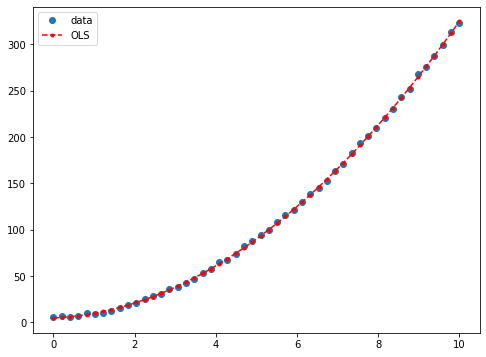

In [5]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')  # 原始数据
ax.plot(x,y_fitted,'r--.',label='OLS')  #拟合数据
ax.legend(loc='best')
plt.show()  # 可以看到图已经非常精确了

**分类变量：**
假设分类变量有3个取值（a,b,c），比如考试成绩有3个等级。a就是（1,0,0），b（0,1,0），c（0,0,1），这个时候就需要3个系数β0，β1，β2，也就是β0x0+β1x1+β2x2

In [6]:
nsample = 50
groups = np.zeros(nsample, int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [7]:
#亚变量，转化成类onehot的形式，变成0，1的形式
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [8]:
# Y = 5+2X+2Z1+6*Z2+9*Z3，Z1、Z2、Z3分别表示取a、b、c
x = np.linspace(0,20,nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [5,2,3,6,9]  #即上面的假设
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2589.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.80e-51
Time:                        21:53:52   Log-Likelihood:                -74.545
No. Observations:                  50   AIC:                             157.1
Df Residuals:                      46   BIC:                             164.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9672      0.635     12.551      0.000       6.689       9.245
x1             2.0457      0.073     28.010      0.000       1.899       2.193
x2            -0.0252      0.403     -0.063      0.950      -0.835       0.785
x3             2.4251      0.336      7.209      0.000       1.748       3.102
x4             5.5673      0.758      7.346      0.000       4.042       7.093
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.224
Skew:                          -0.028   Prob(JB):                        0.894
Kurtosis:                       2.677   Cond. No.                     1.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot  # 可以交互的包，鼠标对着有结果
import plotly.graph_objs as go

init_notebook_mode(connected=True)